In [1]:
import numpy as np
import sklearn 
import sklearn.cluster
import sklearn.mixture
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal
from get_spectogramm import spectrograms
import umap

In [17]:
# load spectograms for both channels. Use window size 1 second without overlap for now
specs = spectrograms("./Mu_-_Too_Bright/mixture.wav",window_size=1,channels=[0,1])

specs[0][0][0].shape

(129,)

In [3]:
def get_vecs(filename,window_size=1,channels=[0,1]):
    specs = spectrograms(filename,window_size=window_size,channels=channels)
    vecs=dict()
    
    for c in channels:
        # get z axis. 
        specs[c] = [x[2] for x in specs[c]]
        # stack samples
        specs[c] = np.stack(specs[c])
        # sum over timesteps
        vecs[c] = np.sum(specs[c],axis=2)
        
    return vecs 

In [4]:
def get_embeddings(vecs, stdscale = True):
    to_reduce = vecs.copy()
    reducer = umap.UMAP()
    if stdscale:
        to_reduce = sklearn.preprocessing.StandardScaler().fit_transform(to_reduce)
    
    return reducer.fit_transform(to_reduce)

In [5]:
def plot_embeddings(embeddings,name,labels='None'):
    title = f"Umap projection of {name}"
    if labels == 'None':
        plt.scatter(
            embeddings[:, 0],
            embeddings[:, 1])
    else:
        cmap = plt.cm.Spectral
        norm = plt.Normalize(vmin=min(labels), vmax=max(labels))
        plt.scatter(
            embeddings[:, 0],
            embeddings[:, 1],c=cmap(norm(labels)))
    plt.gca().set_aspect('equal', 'datalim')
    plt.title(title, fontsize=16)
    plt.show()
    plt.clf()

In [18]:
# compute sum per frequency
vecs = get_vecs("./Mu_-_Too_Bright/mixture.wav",window_size=1,channels=[0,1])
vecs_c0 = vecs[0]
vecs_c1 = vecs[1]
vecs_c0.shape

# (272)

(272, 129)

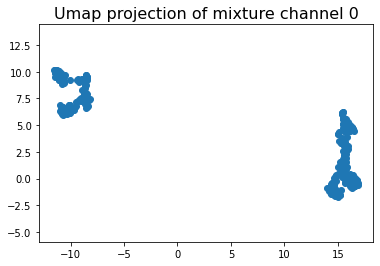

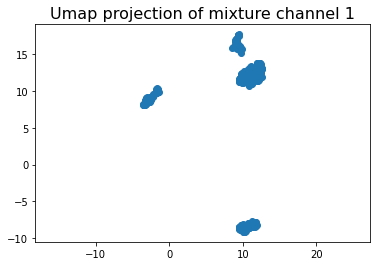

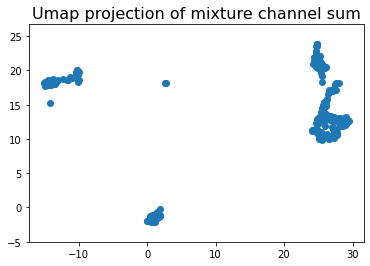

<Figure size 432x288 with 0 Axes>

In [7]:
embeddings0 = get_embeddings(vecs_c0,stdscale=True)
embeddings1 = get_embeddings(vecs_c1,stdscale=True)
embeddins_sum = get_embeddings(vecs_c1+vecs_c0/2,stdscale=True)
plot_embeddings(embeddings0,'mixture channel 0');
plot_embeddings(embeddings1,'mixture channel 1');
plot_embeddings(embeddings0+embeddings1,'mixture channel sum');

In [8]:
def cluster(vecs,method='kmeans',cluster_args=[]):
    if method == 'kmeans':    
        model = sklearn.cluster.KMeans(*cluster_args)
    elif method == 'gauss_mix':
        model = sklearn.mixture.GaussianMixture(*cluster_args)
    model.fit(vecs)
    return model.predict(vecs)

def plot_clustering(filename,title,cluster_method='kmeans',cluster_args=[]):
    vecs = get_vecs(filename,window_size=1,channels=[0,1])
    #sum channels
    vecs = vecs[0]+vecs[1]
    embeddings = get_embeddings(vecs)
    labels = cluster(vecs,cluster_method,cluster_args)
    plot_embeddings(embeddings,f"{cluster_method}_clustering of {title}",labels)
    

<ipython-input-5-381bcab57a66>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labels == 'None':


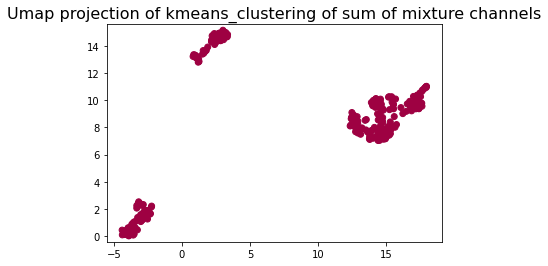

<Figure size 432x288 with 0 Axes>

In [21]:
plot_clustering("./Mu_-_Too_Bright/mixture.wav",'sum of mixture channels',cluster_method='kmeans',cluster_args=[1])

<ipython-input-5-381bcab57a66>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labels == 'None':


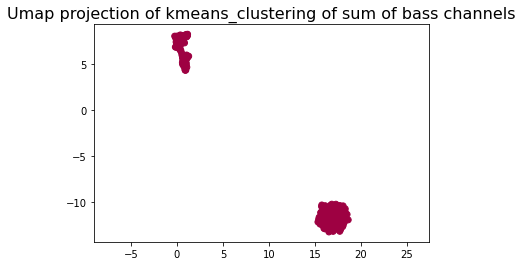

<Figure size 432x288 with 0 Axes>

In [10]:
plot_clustering("./Mu_-_Too_Bright/bass.wav",'sum of bass channels',cluster_method='kmeans',cluster_args=[1])

<ipython-input-5-381bcab57a66>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labels == 'None':


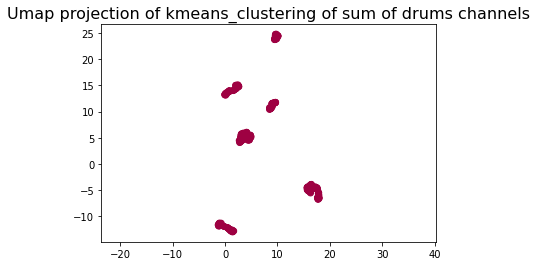

<Figure size 432x288 with 0 Axes>

In [23]:
plot_clustering("./Mu_-_Too_Bright/drums.wav",'sum of drums channels',cluster_method='kmeans',cluster_args=[1])

<ipython-input-5-381bcab57a66>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labels == 'None':


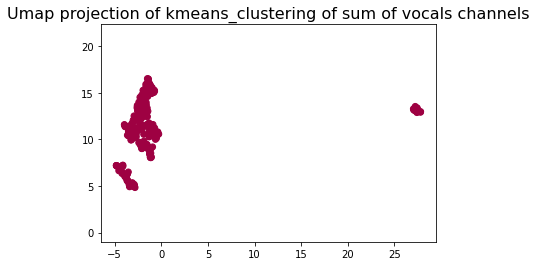

<Figure size 432x288 with 0 Axes>

In [12]:
plot_clustering("./Mu_-_Too_Bright/vocals.wav",'sum of vocals channels',cluster_method='kmeans',cluster_args=[1])

<ipython-input-5-381bcab57a66>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labels == 'None':


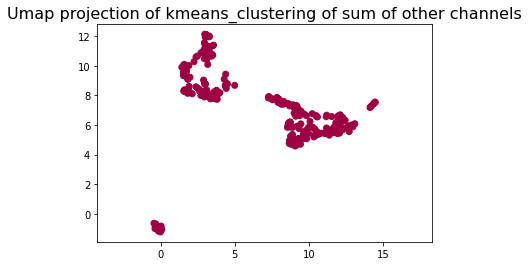

<Figure size 432x288 with 0 Axes>

In [13]:
plot_clustering("./Mu_-_Too_Bright/other.wav",'sum of other channels',cluster_method='kmeans',cluster_args=[1])